In [12]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

(816, 1006)


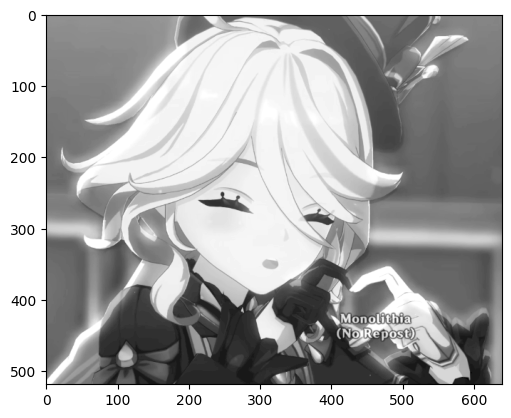

In [13]:
image = cv.imread("furina/furina.png", cv.IMREAD_GRAYSCALE)
print(image.shape) # 816 rows and 1006 columns matrix
image = cv.resize(image, (640, int(image.shape[0] * (640 / image.shape[1]))))

plt.imshow(image, cmap='gray')

### What Does "Bins" Mean in Image Processing?

When creating a histogram for an image:

   + Pixel Intensity Range:
        + For grayscale images: Pixel values range from 0 to 255.
        + For color images (RGB or HSV): Each channel has a range of 0 to 255.

   + Bins Divide the Range:
        + If you set bins=256, each bin corresponds to exactly one intensity level (0, 1, 2, ..., 255).
        + If you set bins=64, each bin represents a range of 4 intensity levels (e.g., bin 0: 0–3, bin 1: 4–7, ..., bin 63: 252–255).

In [14]:
# Create a dictionary with key values from [0, 255] represent the color range. Count each pixels and add 1 to dict[key]
def image_histogram(image):
    histogram = {}
    count_row = 0
    for row in image:
        for pixel in row:
            if pixel in histogram:
                histogram[pixel] += 1
            else:
                histogram[pixel] = 1

    sorted_histogram = {key: histogram[key] for key in sorted(histogram)}
    return sorted_histogram

histogram1 = image_histogram(image)
print(histogram1)

{0: 4, 1: 1, 3: 2, 4: 1, 5: 1, 6: 1, 8: 1, 9: 1, 10: 5, 11: 1, 12: 1, 13: 2, 14: 2, 15: 4, 16: 1, 17: 1, 19: 1, 20: 2, 21: 2306, 22: 150, 23: 156, 24: 138, 25: 130, 26: 172, 27: 178, 28: 3173, 29: 328, 30: 308, 31: 263, 32: 279, 33: 359, 34: 4556, 35: 395, 36: 392, 37: 407, 38: 457, 39: 4815, 40: 473, 41: 505, 42: 474, 43: 7210, 44: 458, 45: 527, 46: 1655, 47: 370, 48: 327, 49: 378, 50: 2197, 51: 373, 52: 377, 53: 1234, 54: 348, 55: 369, 56: 906, 57: 300, 58: 343, 59: 874, 60: 408, 61: 1075, 62: 284, 63: 316, 64: 1232, 65: 379, 66: 992, 67: 405, 68: 1115, 69: 433, 70: 1027, 71: 447, 72: 1230, 73: 506, 74: 1147, 75: 505, 76: 1367, 77: 499, 78: 1123, 79: 587, 80: 2033, 81: 735, 82: 2971, 83: 881, 84: 6030, 85: 4932, 86: 1038, 87: 4735, 88: 957, 89: 6369, 90: 4486, 91: 1039, 92: 5436, 93: 3997, 94: 1019, 95: 3547, 96: 3554, 97: 845, 98: 2395, 99: 2436, 100: 782, 101: 2725, 102: 2748, 103: 3167, 104: 881, 105: 2520, 106: 3080, 107: 2235, 108: 819, 109: 3485, 110: 3575, 111: 2662, 112: 4014

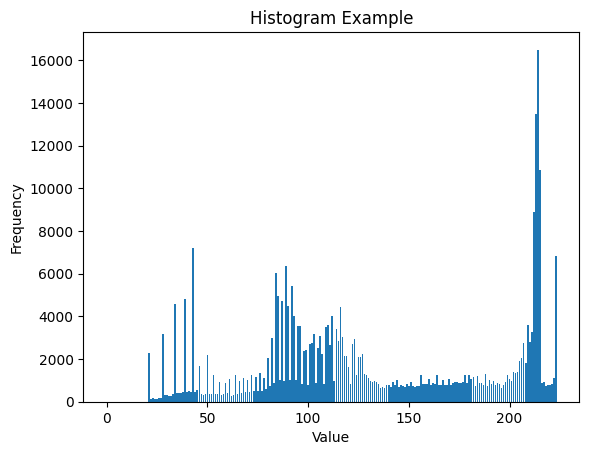

In [15]:
def plot_histogram(histogram):
    color_range = list(histogram.keys())
    frequencies = list(histogram.values())

    plt.bar(color_range, frequencies)

    # Add title and labels
    plt.title('Histogram Example')
    plt.xlabel('Value')
    plt.ylabel('Frequency')

    # Show plot
    plt.show()
    
plot_histogram(histogram1)

original histogram: {0: 4, 1: 1, 3: 2, 4: 1, 5: 1, 6: 1, 8: 1, 9: 1, 10: 5, 11: 1, 12: 1, 13: 2, 14: 2, 15: 4, 16: 1, 17: 1, 19: 1, 20: 2, 21: 2306, 22: 150, 23: 156, 24: 138, 25: 130, 26: 172, 27: 178, 28: 3173, 29: 328, 30: 308, 31: 263, 32: 279, 33: 359, 34: 4556, 35: 395, 36: 392, 37: 407, 38: 457, 39: 4815, 40: 473, 41: 505, 42: 474, 43: 7210, 44: 458, 45: 527, 46: 1655, 47: 370, 48: 327, 49: 378, 50: 2197, 51: 373, 52: 377, 53: 1234, 54: 348, 55: 369, 56: 906, 57: 300, 58: 343, 59: 874, 60: 408, 61: 1075, 62: 284, 63: 316, 64: 1232, 65: 379, 66: 992, 67: 405, 68: 1115, 69: 433, 70: 1027, 71: 447, 72: 1230, 73: 506, 74: 1147, 75: 505, 76: 1367, 77: 499, 78: 1123, 79: 587, 80: 2033, 81: 735, 82: 2971, 83: 881, 84: 6030, 85: 4932, 86: 1038, 87: 4735, 88: 957, 89: 6369, 90: 4486, 91: 1039, 92: 5436, 93: 3997, 94: 1019, 95: 3547, 96: 3554, 97: 845, 98: 2395, 99: 2436, 100: 782, 101: 2725, 102: 2748, 103: 3167, 104: 881, 105: 2520, 106: 3080, 107: 2235, 108: 819, 109: 3485, 110: 3575, 

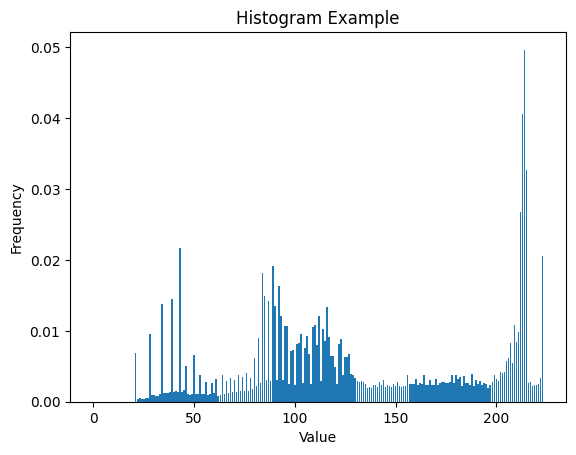

In [16]:
def probability_distribution(histogram):
    pdf_histogram = histogram.copy()
    total_value = sum(pdf_histogram.values())
    
    for key in pdf_histogram:
        pdf_histogram[key] /= total_value
    
    return pdf_histogram # PDF Histogram


print('original histogram:',histogram1)
normalized_histogram = probability_distribution(histogram1)
print('normalized_histogram:', normalized_histogram)

plot_histogram(normalized_histogram)